Project about decision trees and ensemble learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
colnames=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','Class'] 
iris = pd.read_csv('iris.data',names=colnames, header=None)
iris

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


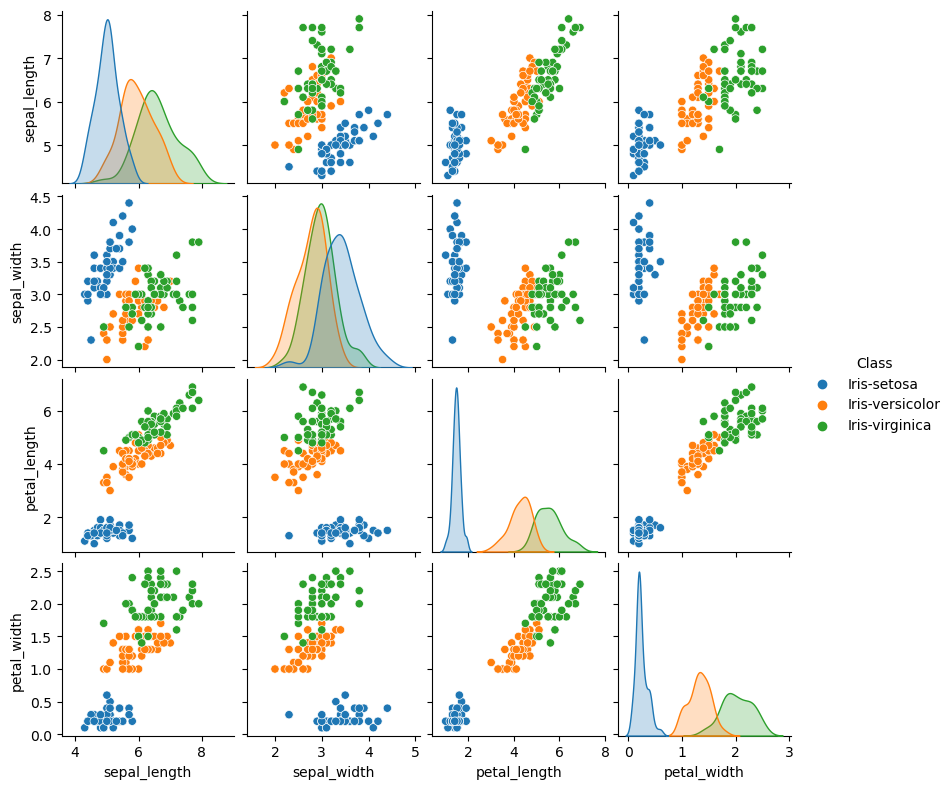

In [3]:
#Exploratory Data Analytics
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris,
             hue='Class', height=2)

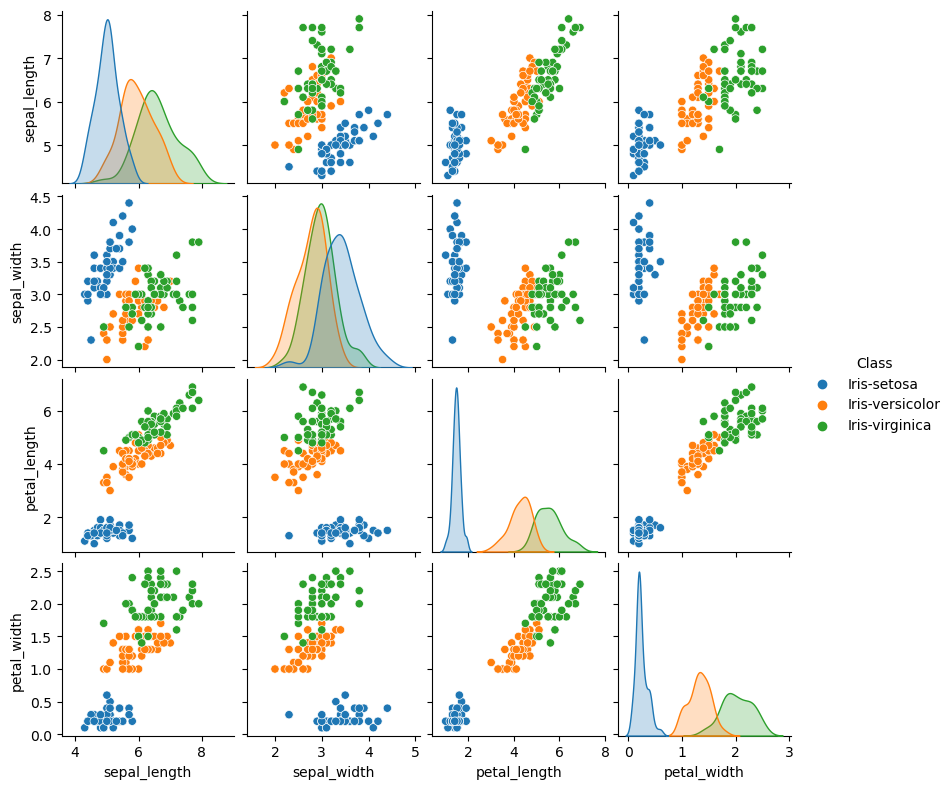

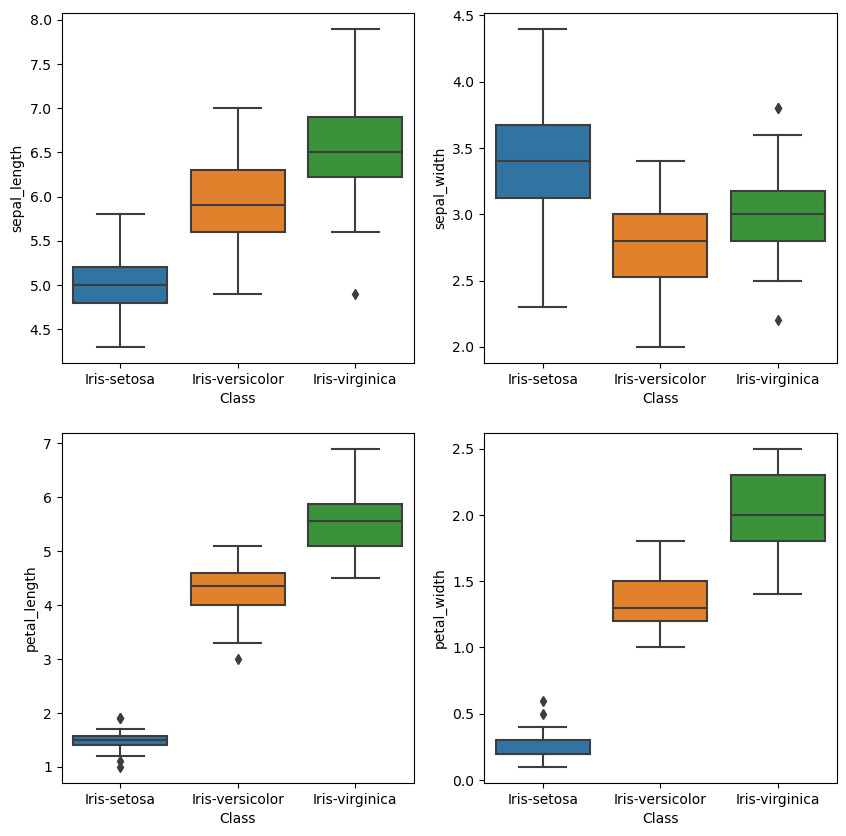

In [22]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
def graph(y):
    sns.boxplot(x="Class", y=y, data=iris)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')
 
plt.subplot(222)
graph('sepal_width')
 
plt.subplot(223)
graph('petal_length')
 
plt.subplot(224)
graph('petal_width')
 
plt.show()

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris['sepal_length'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris['sepal_width'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris['petal_length'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris['petal_width'], bins=6);
plt.show()

In [25]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class'], dtype='object')

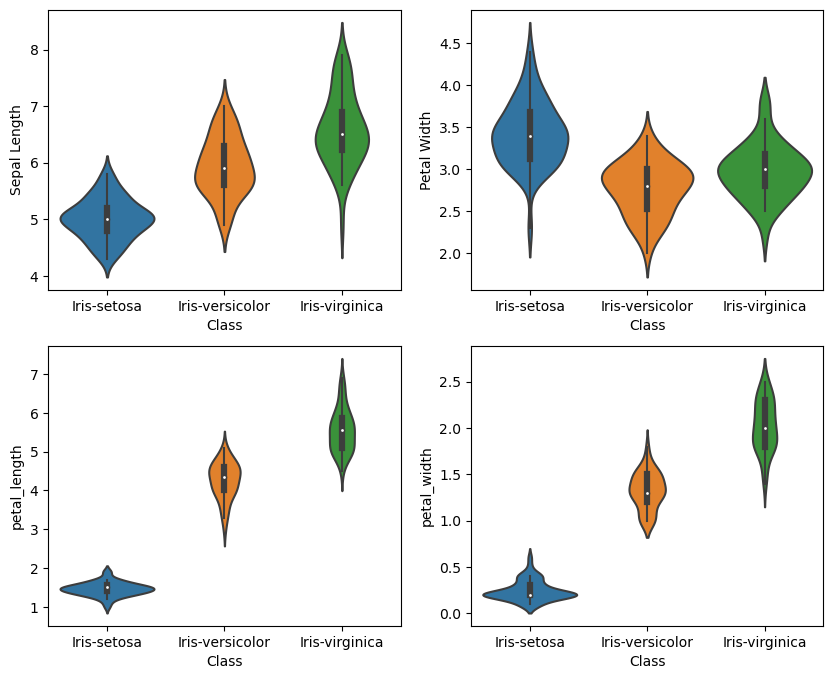

In [57]:
# A violin plot shows the density of the data, similarly to a scatter plot,
#and presents catagorical data like a box plot.
# Denser regions of the data are fatter.

fig, axes = plt.subplots(2, 2, squeeze = False,figsize = (10,8))

sns.violinplot(data=iris, x="Class", y="sepal_length", ax=axes[0,0])
axes[0,0].set_ylabel('Sepal Length', rotation=90) #fontsize=9
sns.violinplot(data=iris, x="Class", y="sepal_width", ax=axes[0,1])
axes[0,1].set_ylabel('Sepal Width', rotation=90)
sns.violinplot(data=iris, x="Class", y="petal_length", ax=axes[1,0])
axes[0,1].set_ylabel('Petal Length', rotation=90)
sns.violinplot(data=iris, x="Class", y="petal_width", ax=axes[1,1])
axes[0,1].set_ylabel('Petal Width', rotation=90)

plt.show()
#Source: https://www.kaggle.com/code/kstaud85/iris-data-visualization

In [90]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class'], dtype='object')

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


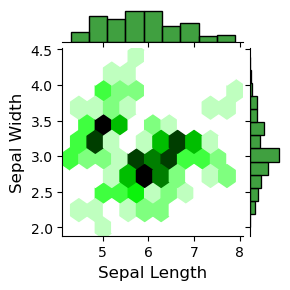

In [104]:
# Hexagonal bin plots:
'''
A hexagonal bin plot is created by covering the data range with a regular array of hexagons and coloring each hexagon 
according to the number of observations it covers. As with all bin plots, the hex-binned plots are good for visualizing 
large data sets for which a scatter plot would suffer from overplotting. 
The bin counts estimate the density of the observations.
'''
# jointplot does not accept subplots, so we need to do 6 graphs separately
jplot = sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=3,ratio=5, kind='hex',color='green')
jplot.set_axis_labels('Sepal Length','Sepal Width', fontsize=12)
plt.show()

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


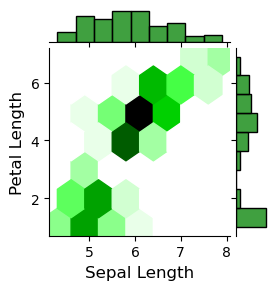

In [100]:
# jointplot does not accept subplots, so we need to do 6 graphs separately
jplot = sns.jointplot(x="sepal_length", y="petal_length", data=iris, size=3,ratio=5, kind='hex',color='green')
jplot.set_axis_labels('Sepal Length', 'Petal Length', fontsize=12)
plt.show()

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


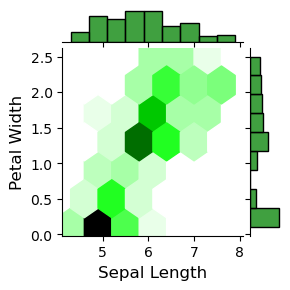

In [99]:
# jointplot does not accept subplots, so we need to do 6 graphs separately
jplot = sns.jointplot(x="sepal_length", y="petal_width", data=iris, size=3,ratio=5, kind='hex',color='green')
jplot.set_axis_labels('Sepal Length', 'Petal Width', fontsize=12)
plt.show()

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


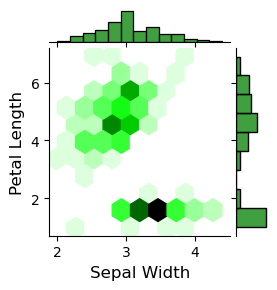

In [101]:
# jointplot does not accept subplots, so we need to do 6 graphs separately
jplot = sns.jointplot(x="sepal_width", y="petal_length", data=iris, size=3,ratio=5, kind='hex',color='green')
jplot.set_axis_labels('Sepal Width', 'Petal Length', fontsize=12)
plt.show()

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


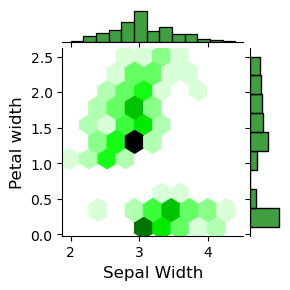

In [102]:
# jointplot does not accept subplots, so we need to do 6 graphs separately
jplot = sns.jointplot(x="sepal_width", y="petal_width", data=iris, size=3,ratio=5, kind='hex',color='green')
jplot.set_axis_labels('Sepal Width', 'Petal width', fontsize=12)
plt.show()

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


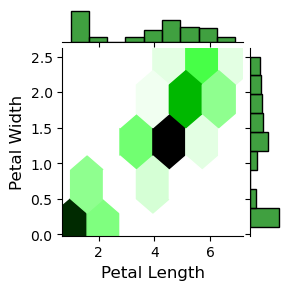

In [103]:
# jointplot does not accept subplots, so we need to do 6 graphs separately
jplot = sns.jointplot(x="petal_length", y="petal_width", data=iris, size=3,ratio=5, kind='hex',color='green')
jplot.set_axis_labels('Petal Length', 'Petal Width', fontsize=12)
plt.show()

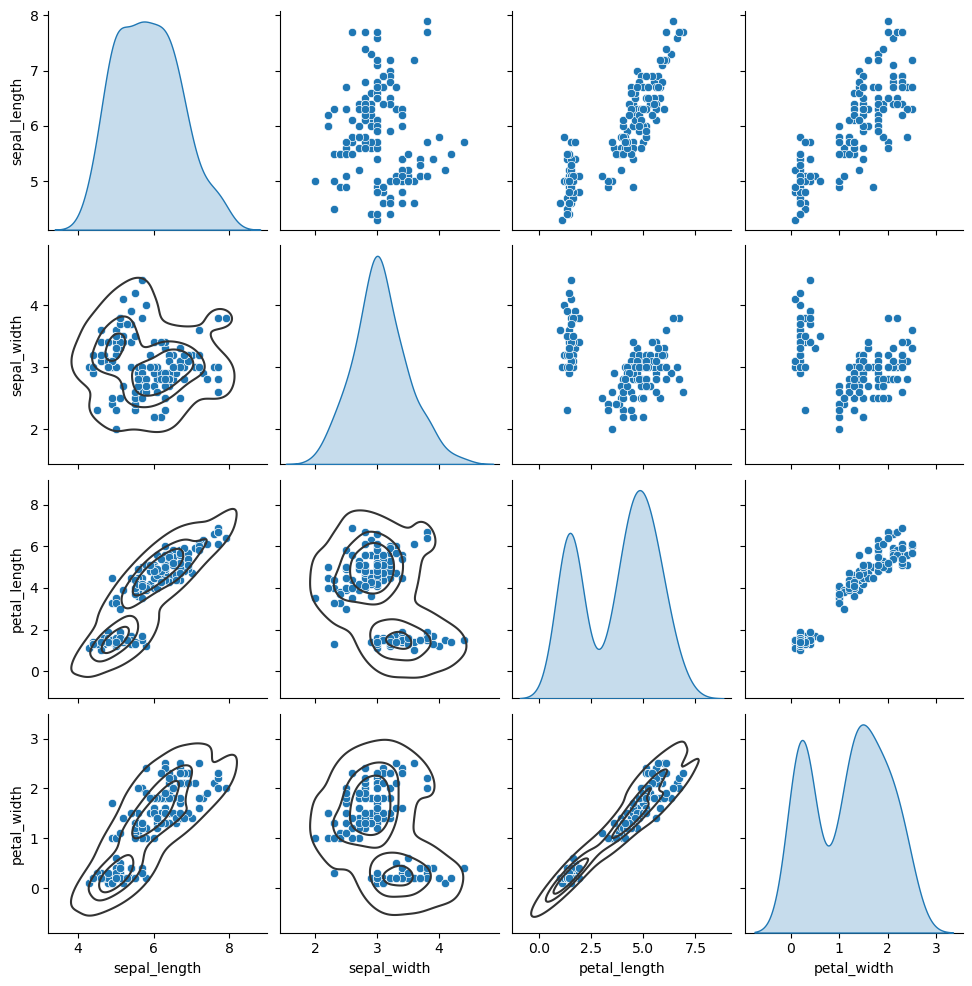

In [89]:
# Kernel density estimation plot of bivariate distributions
g = sns.pairplot(data = iris.drop(columns = ['Class']), diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

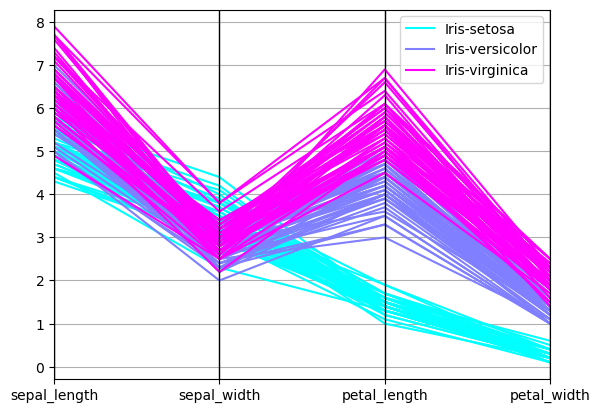

In [106]:
#Parallel_cordinates plot each feature on a seperate column.
#Each feature is then connected by lines, for each data sample
#Again, colormap can be used to choose an assortment of colors. 
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "Class",colormap='cool')
plt.show()

In [4]:
y = np.array(iris.Class)
iris.drop(['Class'],1,inplace=True)
X=iris.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

C:\Users\User\AppData\Local\Temp\ipykernel_10192\1051208405.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  iris.drop(['Class'],1,inplace=True)


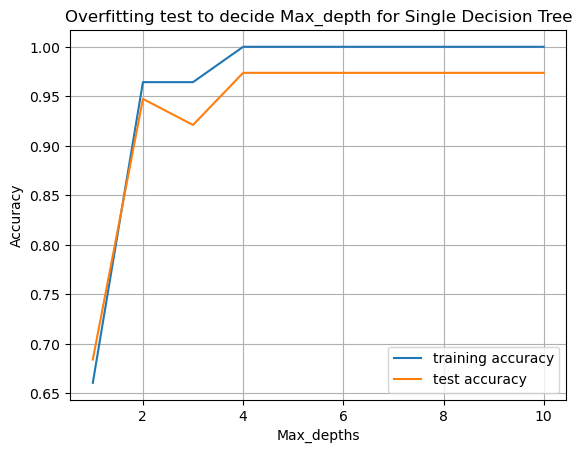

In [52]:
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = DecisionTreeClassifier(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Single Decision Tree");
plt.show()
#use max_depth =4  

In [55]:
#tree = DecisionTreeClassifier(max_depth=4,random_state=8336)
tree = DecisionTreeClassifier(max_depth=4,random_state=6600)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",round(metrics.precision_score(y_test, y_pred,average = "weighted"),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred,average = "weighted"),3))
print("F1 score:",round(metrics.f1_score(y_test, y_pred,average = "weighted"),3))

Accuracy on training set: 1.000
Accuracy on test set: 0.947
Precision: 0.955
Recall: 0.947
F1 score: 0.947


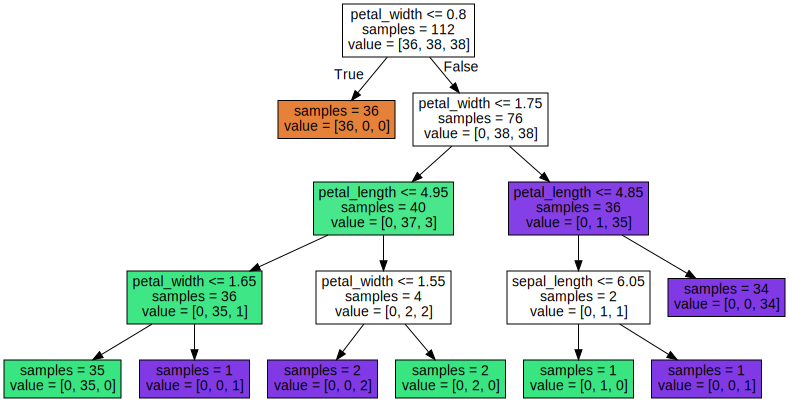

In [56]:
#Visualization of selected regression tree
export_graphviz(tree, out_file="tree.dot",feature_names=iris.columns, impurity=False, filled=True)
export_graphviz(tree, out_file="tree.dot",feature_names=iris.columns, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph,format='png')  
graph

In [33]:
# Save the tree
from graphviz import render
render('dot', 'png', 'tree.dot')

'tree.dot.png'

In [34]:
#plot feature importance
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_decision_tree(model):
    n_features = len(iris.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance of single decision tree")

plot_feature_importances_decision_tree(tree)

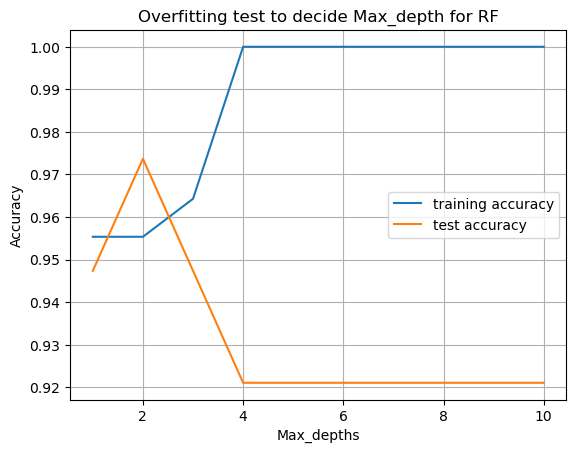

In [58]:
#Check overfitting with max_depth Random Forest
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestClassifier(max_depth=n_depth,random_state=6600)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF");
plt.show()
#use max_depth =4  

In [59]:
forest = RandomForestClassifier(max_depth=4,random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",round(metrics.precision_score(y_test, y_pred,average = "weighted"),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred,average = "weighted"),3))
print("F1 score:",round(metrics.f1_score(y_test, y_pred,average = "weighted"),3))

Accuracy on training set: 1.000
Accuracy on test set: 0.974
Precision: 0.976
Recall: 0.974
F1 score: 0.974


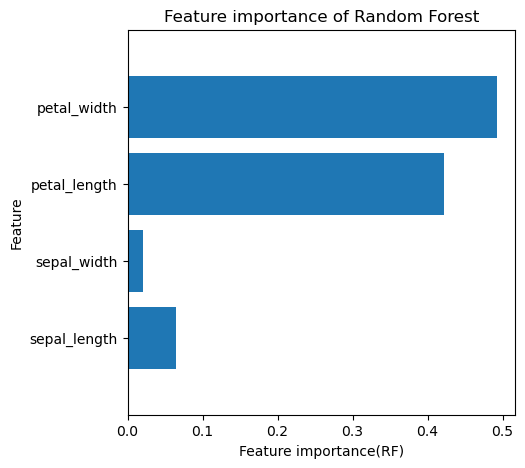

In [37]:
#Plot feature importance
fig,ax=plt.subplots(figsize=(5,5))

def plot_feature_importances_random_forest(model):
    n_features = len(iris.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.columns)
    plt.xlabel("Feature importance(RF)")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance of Random Forest")
    plt.show()

plot_feature_importances_random_forest(forest)

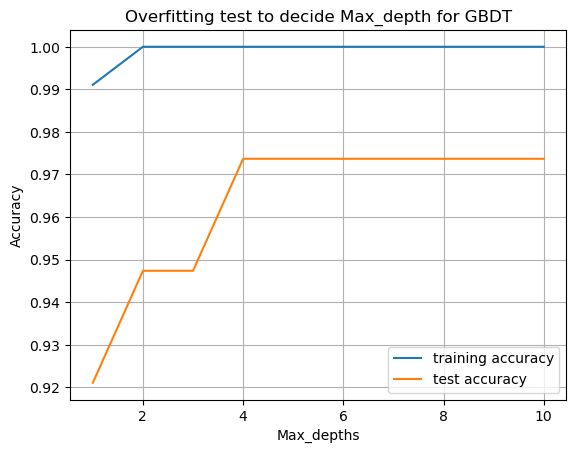

In [60]:
#Check overfitting with max_depth GBDT
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingClassifier(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for GBDT");
plt.show()
#use max_depth =4  

In [63]:
GBDT = GradientBoostingClassifier(max_depth=4,random_state=6608)
GBDT.fit(X_train, y_train)
y_pred = GBDT.predict(X_test)

print("Accuracy on training set: {:.3f}".format(GBDT.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBDT.score(X_test, y_test)))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",round(metrics.precision_score(y_test, y_pred,average = "weighted"),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred,average = "weighted"),3))
print("F1 score:",round(metrics.f1_score(y_test, y_pred,average = "weighted"),3))

Accuracy on training set: 1.000
Accuracy on test set: 0.974
Precision: 0.976
Recall: 0.974
F1 score: 0.974


In [67]:
ABDT = AdaBoostClassifier(n_estimators = 100,random_state=6608)
ABDT.fit(X_train, y_train)
y_pred = ABDT.predict(X_test)

print("Accuracy on training set: {:.3f}".format(ABDT.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ABDT.score(X_test, y_test)))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",round(metrics.precision_score(y_test, y_pred,average = "weighted"),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred,average = "weighted"),3))
print("F1 score:",round(metrics.f1_score(y_test, y_pred,average = "weighted"),3))

Accuracy on training set: 0.946
Accuracy on test set: 0.895
Precision: 0.921
Recall: 0.895
F1 score: 0.892


In [41]:
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_ABDT(model):
    n_features = len(iris.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance AdaBoost Classifier")

plot_feature_importances_ABDT(ABDT)

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
#Check overfitting with max_depth XGB
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = XGBClassifier(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for XGBoost");
#use max_depth =1

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.

[22:42:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.

[22:42:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.

[22:42:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:34] WARNI

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.

[22:46:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.

[22:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.

[22:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


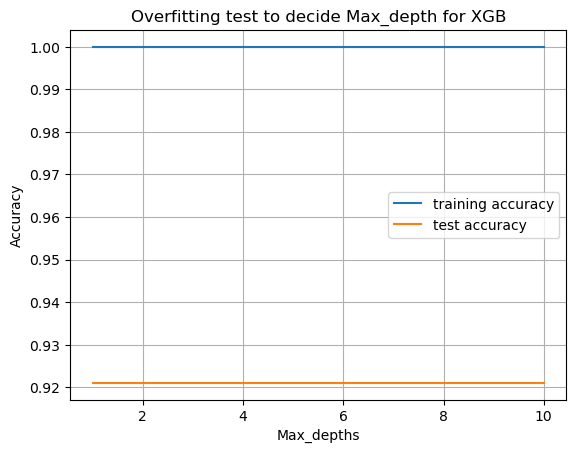

In [72]:
#Check overfitting with max_depth GBDT
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = XGBClassifier(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for XGB");
plt.show()
#use max_depth =4 

In [69]:
XGBoost = XGBClassifier(max_depth=1,random_state=6600)
XGBoost.fit(X_train, y_train)
y_pred = XGBoost.predict(X_test)

print("Accuracy on training set: {:.3f}".format(XGBoost.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(XGBoost.score(X_test, y_test)))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",round(metrics.precision_score(y_test, y_pred,average = "weighted"),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred,average = "weighted"),3))
print("F1 score:",round(metrics.f1_score(y_test, y_pred,average = "weighted"),3))

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:42:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set: 1.000
Accuracy on test set: 0.921
Precision: 0.937
Recall: 0.921
F1 score: 0.92


In [44]:
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_XBDT(model):
    n_features = len(iris.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance XGBoost Classifier")

plot_feature_importances_XBDT(XGBoost)

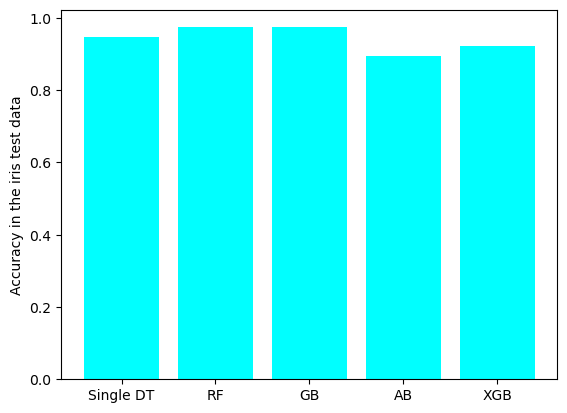

In [74]:
Model = ['Single DT','RF','GB','AB','XGB']
Accuracy = [0.947,0.974,0.974,0.895,0.921]
plt.bar(Model,Accuracy, color ='cyan')
plt.ylabel("Accuracy in the iris test data");
plt.savefig('barplot_Project_1.png', dpi = 300)
plt.show()